In [40]:
# DEMONSTRATE GRIDSEARCH WITH CASE14
import pandas as pd
import pandapower as pp
import pandapower.networks as ppnets
#from pandapower.plotting import simple_plot, simple_plotly, pf_res_plotly
import pandapower.plotting as plt
import pandapower.plotting.plotly as pplotly
import matplotlib.pyplot as mplt


In [41]:
net =  ppnets.case14() 

In [42]:
net

This pandapower network includes the following parameter tables:
   - bus (14 elements)
   - load (11 elements)
   - gen (4 elements)
   - shunt (1 element)
   - ext_grid (1 element)
   - line (15 elements)
   - trafo (5 elements)
   - poly_cost (5 elements)
   - bus_geodata (14 elements)

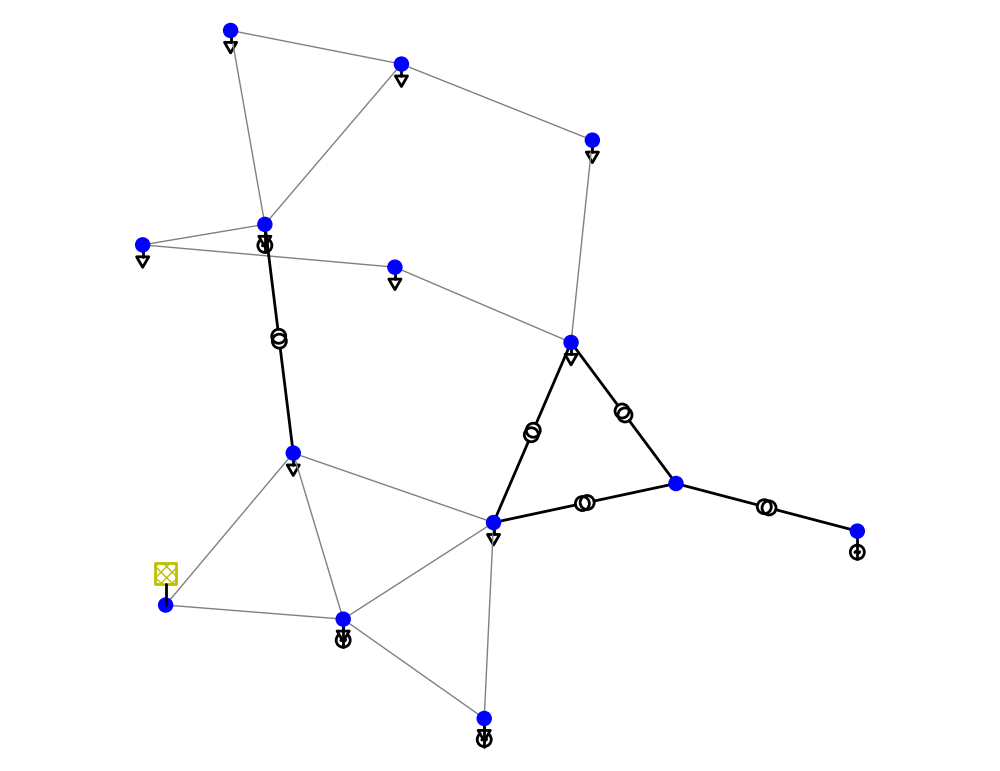

<Axes: >

In [43]:
plt.simple_plot(net,  plot_loads=True, plot_gens=True)

In [44]:
# disconnect from external grid - create an island
net.ext_grid['in_service']=False

In [46]:
net.load

,name,bus,p_mw,q_mvar,const_z_percent,const_i_percent,sn_mva,scaling,in_service,type,controllable
0,None,1,21.7,12.7,0.0,0.0,NaN,1.0,True,None,False
1,None,2,94.2,19.0,0.0,0.0,NaN,1.0,True,None,False
2,None,3,47.8,-3.9,0.0,0.0,NaN,1.0,True,None,False
3,None,4,7.6,1.6,0.0,0.0,NaN,1.0,True,None,False
4,None,5,11.2,7.5,0.0,0.0,NaN,1.0,True,None,False
5,None,8,29.5,16.6,0.0,0.0,NaN,1.0,True,None,False
6,None,9,9.0,5.8,0.0,0.0,NaN,1.0,True,None,False
7,None,10,3.5,1.8,0.0,0.0,NaN,1.0,True,None,False
8,None,11,6.1,1.6,0.0,0.0,NaN,1.0,True,None,False
9,None,12,13.5,5.8,0.0,0.0,NaN,1.0,True,None,False


In [28]:
# increase the load by 50%
net.load.scaling=1.5 
net.load.sum()

name                   0
bus                   78
p_mw               259.0
q_mvar              73.5
const_z_percent      0.0
const_i_percent      0.0
sn_mva               0.0
scaling             16.5
in_service            11
type                   0
controllable           0
dtype: object

In [29]:
net.gen['vm_pu']=1.045

In [30]:
net.gen

,name,bus,p_mw,vm_pu,sn_mva,min_q_mvar,max_q_mvar,scaling,slack,in_service,slack_weight,type,controllable,max_p_mw,min_p_mw
0,None,1,40.0,1.045,NaN,-40.0,50.0,1.0,False,True,0.0,None,True,140.0,0.0
1,None,2,0.0,1.045,NaN,0.0,40.0,1.0,False,True,0.0,None,True,100.0,0.0
2,None,5,0.0,1.045,NaN,-6.0,24.0,1.0,False,True,0.0,None,True,100.0,0.0
3,None,7,0.0,1.045,NaN,-6.0,24.0,1.0,False,True,0.0,None,True,100.0,0.0


In [31]:
# Perform a simple generator dispatch by maxing out the first three generators and setting the fourth one as the slack.
net.gen.loc[0,'p_mw'] = 120 
net.gen.loc[1,'p_mw'] = 100 
net.gen.loc[2,'p_mw'] = 100
net.gen.loc[3,'slack'] = True 

In [32]:
net.gen

,name,bus,p_mw,vm_pu,sn_mva,min_q_mvar,max_q_mvar,scaling,slack,in_service,slack_weight,type,controllable,max_p_mw,min_p_mw
0,None,1,120.0,1.045,NaN,-40.0,50.0,1.0,False,True,0.0,None,True,140.0,0.0
1,None,2,100.0,1.045,NaN,0.0,40.0,1.0,False,True,0.0,None,True,100.0,0.0
2,None,5,100.0,1.045,NaN,-6.0,24.0,1.0,False,True,0.0,None,True,100.0,0.0
3,None,7,0.0,1.045,NaN,-6.0,24.0,1.0,True,True,0.0,None,True,100.0,0.0


In [33]:
pp.runpp(net,numba=False)

In [34]:
# Real power: gen ?= load + shunt(consumption) + xward + losses + export
#P_rhs = P_load + max(P_shunt, 0.0) + P_xward + P_loss + P_export
#Q_rhs = Q_load + Q_loss + Q_shunt + Q_xward + Q_export

# the basic way
print('P_load = ' ,net.res_load['p_mw'].sum())
print('P_gen = ' ,net.res_gen['p_mw'].sum()+net.res_sgen['p_mw'].sum()+net.res_ext_grid['p_mw'].sum())
print('P_shunt = ',net.res_shunt['p_mw'].sum())
print('P_loss = ',net.res_line['pl_mw'].sum()+net.res_trafo['pl_mw'].sum())
print('***************************')
print('Q_load = ' ,net.res_load['q_mvar'].sum())
print('Q_gen = ' ,net.res_gen['q_mvar'].sum()+net.res_sgen['q_mvar'].sum()+net.res_ext_grid['q_mvar'].sum())
print('Q_shunt = ',net.res_shunt['q_mvar'].sum())
print('Q_loss = ',net.res_line['ql_mvar'].sum()+net.res_trafo['ql_mvar'].sum())

P_load =  388.50000000000006
P_gen =  392.0112578522992
P_shunt =  0.0
P_loss =  3.5112579076550254
***************************
Q_load =  110.25000000000001
Q_gen =  90.53934119846252
Q_shunt =  -19.45330802006989
Q_loss =  -0.2573506472367484


In [36]:
# super basic contingency analysis

lines = net.line.index
critical_lines = []
critical_lines_indx = []

vmax = 1.05
vmin = 0.95
line_loading_max = 100

for l in lines:
    net.line.loc[l, 'in_service'] = False
    pp.runpp(net, numba=False)
    if net.res_bus.vm_pu.max()>vmax:
        critical_lines.append([l, 'hv'])
        critical_lines_indx.append(l)
    if net.res_bus.vm_pu.min() < vmin:
        critical_lines.append([l, 'lv'])
        critical_lines_indx.append(l)
    if net.res_line.loading_percent.max() > line_loading_max:
        critical_lines.append([l, 'ol'])
        critical_lines_indx.append(l)
    net.line.loc[l, 'in_service'] = True

In [38]:
critical_lines

[[9, 'lv'], [11, 'lv']]

use_bus_geodata is automatically set to True, since net.line_geodata is empty.


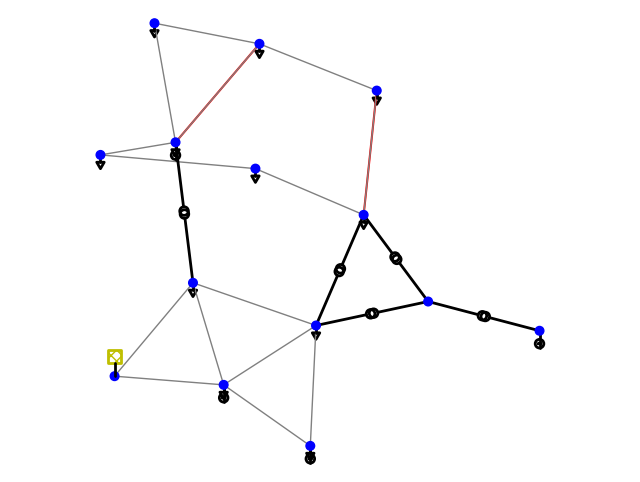

In [39]:
fig, ax = mplt.subplots()
fig.set_figheight(6)
fig.set_figwidth(8)

critical_lc = plt.create_line_collection(net, critical_lines_indx, color="r", zorder=2) #create lines

plt.draw_collections([critical_lc], ax=ax);
plt.simple_plot(net,  plot_loads=True, plot_gens=True,  ax=ax, show_plot=False);

mplt.show()